# <span style="color:darkblue"> Laboratorio di Simulazioni Numeriche </span>
## <span style="color:purple"> Lezione 3 - Pricing di Opzioni: Percorsi Discretizzati </span>

### Obiettivo
Valutare opzioni europee simulando **percorsi discretizzati** dell'asset sottostante e confrontare i risultati con il modello Black-Scholes analitico.

<p style="border:2px; border-style:solid; border-color:#E6E6FA; padding: 1em; background-color:#F0F8FF">
<b>Discretizzazione del moto Browniano geometrico:</b><br>
Invece di simulare direttamente $S_T$, discretizziamo il percorso in $N$ step temporali:
$$S_{t+\Delta t} = S_t \exp\left[\left(r - \frac{\sigma^2}{2}\right)\Delta t + \sigma\sqrt{\Delta t}\, Z\right]$$
dove $Z \sim \mathcal{N}(0,1)$ e $\Delta t = T/N$.
<br><br>
<b>Vantaggi della discretizzazione:</b><br>
• Permette il pricing di opzioni <b>path-dependent</b> (asiatiche, barrier, etc.)<br>
• Simula realisticamente la dinamica dell'asset nel tempo<br>
• Consente il controllo della volatilità realizzata lungo il percorso
</p>

=== PRICING CON PERCORSI DISCRETIZZATI ===
Numero di blocchi analizzati: 100
Metodo: Simulazione di percorsi completi dell'asset

PREZZI FINALI (DISCRETIZZATI):
Call Option:
  Monte Carlo:    14.968300 ± 0.065174
  Black-Scholes:  14.975791
  Differenza:     0.007491

Put Option:
  Monte Carlo:    5.417360 ± 0.027333
  Black-Scholes:  5.459533
  Differenza:     0.042173

ACCURATEZZA RELATIVA:
Call Option: 0.0500%
Put Option:  0.7725%


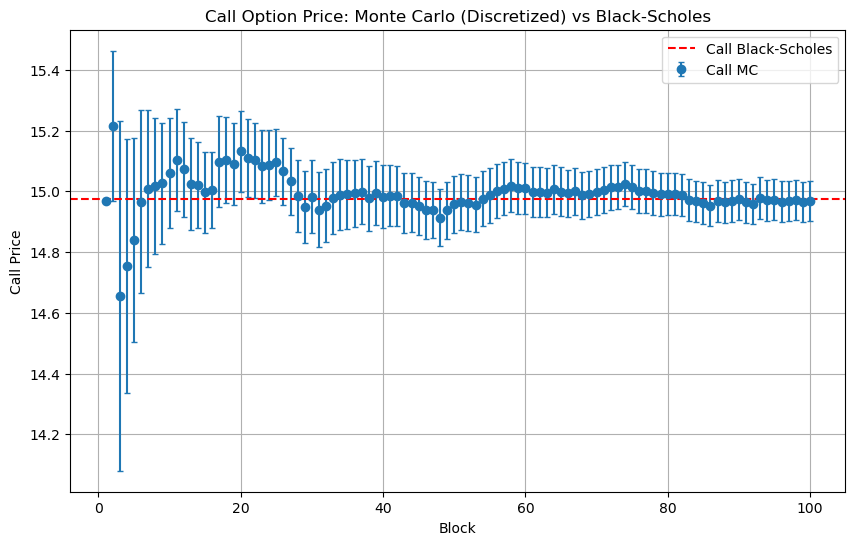

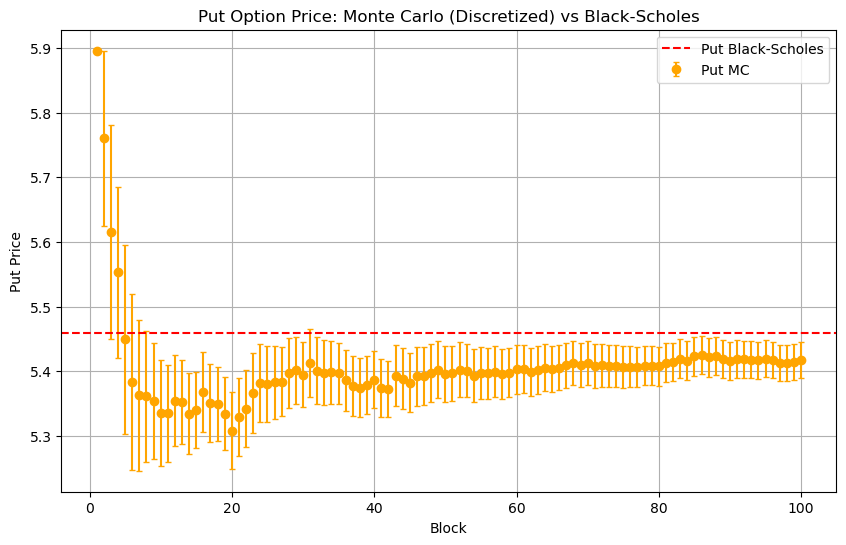

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Analisi del Pricing con Percorsi Discretizzati**

# Carica dati dal file
data = np.loadtxt("option_prices_discretized.dat", skiprows=1)

# Estrai colonne
block = data[:, 0]
call_price = data[:, 1]
call_error = data[:, 2]
put_price = data[:, 3]
put_error = data[:, 4]

# Valori teorici Black-Scholes
bs_call = 14.975790778311286
bs_put = 5.4595325819072364

print("=== PRICING CON PERCORSI DISCRETIZZATI ===")
print(f"Numero di blocchi analizzati: {len(block)}")
print("Metodo: Simulazione di percorsi completi dell'asset")
print()

# Risultati finali
print("PREZZI FINALI (DISCRETIZZATI):")
print(f"Call Option:")
print(f"  Monte Carlo:    {call_price[-1]:.6f} ± {call_error[-1]:.6f}")
print(f"  Black-Scholes:  {bs_call:.6f}")
print(f"  Differenza:     {abs(call_price[-1] - bs_call):.6f}")
print()
print(f"Put Option:")
print(f"  Monte Carlo:    {put_price[-1]:.6f} ± {put_error[-1]:.6f}")
print(f"  Black-Scholes:  {bs_put:.6f}")
print(f"  Differenza:     {abs(put_price[-1] - bs_put):.6f}")
print()

# Accuratezza relativa
call_accuracy = abs(call_price[-1] - bs_call) / bs_call * 100
put_accuracy = abs(put_price[-1] - bs_put) / bs_put * 100
print(f"ACCURATEZZA RELATIVA:")
print(f"Call Option: {call_accuracy:.4f}%")
print(f"Put Option:  {put_accuracy:.4f}%")

# Plot CALL Option
plt.figure(figsize=(10,6))
plt.errorbar(block, call_price, yerr=call_error, fmt='o', capsize=2, label='Call MC')
plt.axhline(bs_call, color='red', linestyle='--', label='Call Black-Scholes')
plt.xlabel('Block')
plt.ylabel('Call Price')
plt.title('Call Option Price: Monte Carlo (Discretized) vs Black-Scholes')
plt.grid(True)
plt.legend()
plt.show()

# Plot PUT Option
plt.figure(figsize=(10,6))
plt.errorbar(block, put_price, yerr=put_error, fmt='o', capsize=2, color='orange', label='Put MC')
plt.axhline(bs_put, color='red', linestyle='--', label='Put Black-Scholes')
plt.xlabel('Block')
plt.ylabel('Put Price')
plt.title('Put Option Price: Monte Carlo (Discretized) vs Black-Scholes')
plt.grid(True)
plt.legend()
plt.show()

### **Interpretazione dei Risultati**

La simulazione con percorsi discretizzati offre insights più profondi sulla dinamica delle opzioni:

**Discretizzazione vs Soluzione Analitica:**
- La discretizzazione introduce un **errore di discretizzazione** oltre all'errore Monte Carlo
- L'accordo con Black-Scholes valida la correttezza dell'implementazione numerica
- Piccole discrepanze possono derivare dal numero finito di step temporali

**Vantaggi dei Percorsi Discretizzati:**
- **Controllo del rischio**: monitoraggio della volatilità realizzata lungo il percorso, controllo ad ogni step
- **Modelli più complessi**: e.g. volatilità stocastica

**Efficienza Computazionale:**
- Maggior costo computazionale rispetto al metodo one-step
- La discretizzazione richiede generazione di più numeri casuali per percorso
- Trade-off tra accuratezza e tempo di calcolo

**Convergenza e Stabilità:**
- Le deviazioni entro i limiti di confidenza confermano la stabilità statistica
- La riduzione degli errori segue la legge Monte Carlo $1/\sqrt{N}$
